In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import TruncatedSVD

In [0]:
def scores(classifier, X, y):
    accuracy = cross_val_score(classifier, X, y, cv=10).mean()
    precision = cross_val_score(classifier, X, y, cv=10, scoring='precision').mean()
    recall = cross_val_score(classifier, X, y, cv=10, scoring='recall').mean()
    f1 = cross_val_score(classifier, X, y, cv=10, scoring='f1').mean()
    columns = ['accuracy', 'precision', 'recall', 'f1']
    results = pd.DataFrame([accuracy, precision, recall, f1], index=columns).T
    return results

In [0]:
df = pd.read_csv('sin_movie.csv')

1000 положительных и 1000 отрицательных отзывов
* столбец text - просто текст отзыва
* столбец sin_text - синтаксические биграммы, построенные по дереву зависимостей

In [6]:
df

,text,labels,sin_text
0,now that boogie nights has made disco respecta...,1.0,surprisedmade madenow madethat madenights nigh...
1,based on the relatively unknown in comparison ...,1.0,tellscomparison comparisonbased comparisonon c...
2,i was going to see ram shrasta on the big scre...,0.0,goingi goingwas goingsee seeto seeshrasta shra...
3,i wonder if budget is at all a criterion for w...,0.0,wonderi wondercriterion criterionif criterionb...
4,modern audiences are more likely to be familia...,1.0,likelyaudiences audiencesmodern likelyare like...
...,...,...,...
1995,call me crazy but i don t see saving private r...,1.0,callme callcrazy callsee seebut seei it tdon s...
1996,s alien marked not only the death by suicide o...,1.0,includedmarked markeds markedalien markedsavag...
1997,plot two sister witches have to live with a cu...,0.0,plotwitches witchestwo witchessister plothave ...
1998,deserves recognition for achieving the near im...,0.0,deservesrecognition deservesachieving achievin...


In [0]:
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['text'])
X_sin_text = vectorizer.fit_transform(df['sin_text'])

In [9]:
X_text.shape, X_sin_text.shape

((2000, 38885), (2000, 672541))

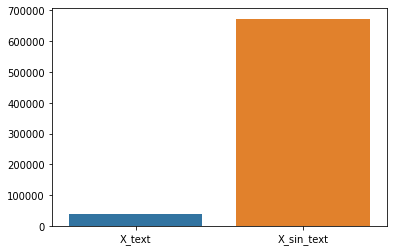

In [10]:
sns.barplot(['X_text', 'X_sin_text'], [X_text.shape[1], X_sin_text.shape[1]])

Ну да, в варианте с биграммами их намного больше

Если брать те, которые встречаются минимум 2 раза, то признаков гораздо меньше 

In [0]:
vectorizer2 = TfidfVectorizer(min_df=2)
X_text2 = vectorizer2.fit_transform(df['text'])
X_sin_text2 = vectorizer2.fit_transform(df['sin_text'])

In [0]:
X_text2.shape, X_sin_text2.shape

((2000, 23797), (2000, 122201))

In [0]:
y = df['labels']

Не уверена, что так можно, поэтому оставим как есть

In [0]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sin_text'])
y = df['labels']

In [8]:
X.shape

(2000, 672541)

In [21]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Почти везде нули, но где-то внутри есть другие числа

In [0]:
log = LogisticRegression(solver='saga', random_state=42)

In [0]:
scores(log, X, y)

,accuracy,precision,recall,f1
0,0.819,0.816442,0.826,0.820443


### SVD 

Сначала подберем параметр n_iter

In [0]:
ite = [i for i in range(5, 51, 5)]

In [0]:
for i in ite:
  svd = TruncatedSVD(n_components=120, n_iter=i, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(log, S, y))
  print('#####')

5
   accuracy  precision  recall        f1
0     0.757   0.760136   0.752  0.755538
#####
10
   accuracy  precision  recall        f1
0       0.8   0.800356   0.802  0.800272
#####
15
   accuracy  precision  recall        f1
0     0.814   0.813721   0.818  0.814838
#####
20
   accuracy  precision  recall        f1
0     0.821   0.820437   0.825  0.821704
#####
25
   accuracy  precision  recall        f1
0    0.8205   0.819259   0.826  0.821669
#####
30
   accuracy  precision  recall        f1
0    0.8195   0.818044   0.825  0.820622
#####
35
   accuracy  precision  recall        f1
0    0.8215   0.818564   0.829  0.822969
#####
40
   accuracy  precision  recall        f1
0     0.824    0.81986   0.833  0.825684
#####
45
   accuracy  precision  recall        f1
0     0.821   0.816215   0.831  0.822878
#####
50
   accuracy  precision  recall        f1
0     0.821   0.816111   0.831  0.822817
#####


In [0]:
svd = TruncatedSVD(n_components=120, n_iter=100, random_state=42)
S = svd.fit_transform(X)
scores(log, S, y)

,accuracy,precision,recall,f1
0,0.8175,0.814679,0.824,0.818636


Возьмем n_iter=40, так как дальше нет улучшения качества

In [0]:
comp = [100, 150, 200, 500, 1000]

In [0]:
for i in comp:
  svd = TruncatedSVD(n_components=i, n_iter=40, random_state=42)
  S = svd.fit_transform(X)
  print(i)
  print(scores(log, S, y))
  print('#####')

100
   accuracy  precision  recall        f1
0     0.822   0.820906   0.826  0.822312
#####
150
   accuracy  precision  recall        f1
0     0.834   0.826745   0.846  0.835678
#####
200
   accuracy  precision  recall        f1
0    0.8445   0.838646   0.854  0.845597
#####
500
   accuracy  precision  recall       f1
0     0.839   0.835971   0.844  0.83929
#####
1000
   accuracy  precision  recall        f1
0    0.8055   0.810277   0.801  0.804293
#####


Допустим оптимальными будут n_components=200 и n_iter=40

In [0]:
svd = TruncatedSVD(n_components=200, n_iter=40, random_state=42)
S = svd.fit_transform(X)

In [10]:
S.shape

(2000, 200)

#### LogisticRegression

In [0]:
scores(log, S, y)

,accuracy,precision,recall,f1
0,0.842,0.835655,0.854,0.843961


#### KNN

In [0]:
knn = KNeighborsClassifier()

In [12]:
scores(knn, S, y)

,accuracy,precision,recall,f1
0,0.6725,0.660412,0.716,0.685721


Подбор параметров для knn

In [0]:
random_grid = {'n_neighbors': [i for i in range(5, 500, 10)],
               'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
               }
knn_random = GridSearchCV(knn, random_grid, cv=3, verbose=2, n_jobs=-1)

In [14]:
knn_random.fit(S, y)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [5, 15, 25, 35, 45, 55, 65, 75, 85, 95,
                                         105, 115, 125, 135, 145, 155, 165, 175,
                                         185, 195, 205, 215, 225, 235, 245, 255,
                                         265, 275, 285, 295, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

In [0]:
knn_best_random = knn_random.best_estimator_

In [20]:
knn_random.best_params_

{'metric': 'manhattan', 'n_neighbors': 215}

In [17]:
scores(knn_best_random, S, y)

,accuracy,precision,recall,f1
0,0.7505,0.744039,0.774,0.755784


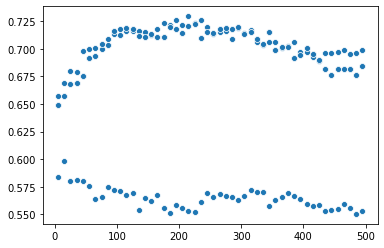

In [18]:
cs = [i for i in knn_random.cv_results_['param_n_neighbors']]
quals = [i for i in knn_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

После k > 200 качество начинает падать, поэтому брать большее кол-во k нет смысла

#### RandomForestClassifier

In [0]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [0]:
scores(rfc, S, y)

,accuracy,precision,recall,f1
0,0.7635,0.775398,0.743,0.757756


##### RandomizedSearchCV

Подбор параметров для random forest

In [0]:
random_grid = {'n_estimators': [i for i in range(100, 1501, 200)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [i for i in range(10, 111, 10)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(rfc, random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [0]:
rf_random.fit(S, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1500}

In [0]:
best_random = rf_random.best_estimator_

In [0]:
scores(best_random, S, y)

,accuracy,precision,recall,f1
0,0.776,0.780729,0.769,0.774212


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


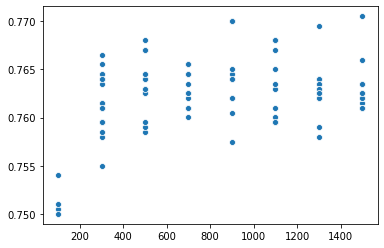

In [0]:
cs = [i for i in rf_random.cv_results_['param_n_estimators']]
quals = [i for i in rf_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

Видимо чем больше n_estimators, тем лучше, хотя разница не большая

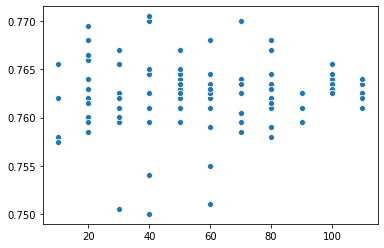

In [0]:
cs = [i for i in rf_random.cv_results_['param_max_depth']]
quals = [i for i in rf_random.cv_results_['mean_test_score']]
sns.scatterplot(cs, quals)

Лучший результат с max_depth=40, далее качество падает

Потом я решила использовать GridSearchCV, чтобы рассмотреть значения параметров, близкий к лучшему варианту из RandomizedSearchCV

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [900, 1400, 1600]
}
gs = GridSearchCV(rfc, param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [0]:
gs.fit(S, y)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 26.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [0]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
best_rfc = gs.best_estimator_

In [0]:
scores(best_rfc, S, y)

,accuracy,precision,recall,f1
0,0.7775,0.78604,0.765,0.774395


Результат почти такой же, как и в RandomizedSearchCV

#### LinearSVC

Тут тоже нужно будет подобрать параметры

In [0]:
svc = LinearSVC(random_state=42)

In [0]:
scores(svc, S, y)

,accuracy,precision,recall,f1
0,0.8445,0.842949,0.85,0.84558


Наверное для l1 регуляризации нужно попробавать взять большее значение параметра С

In [0]:
logs = LogisticRegression(solver='saga', random_state=42)

In [0]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 30, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }
]
gs = GridSearchCV(logs, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [0]:
gs.fit(S, y)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 14.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 6.15848...
       1.43844989e+03, 8.85866790e+04, 5.45559478e+06, 3.35981829e+08,
       2.06913808e+10, 1.27427499e+12, 7.84759970e+13, 4.83293024e+15,
       2.97635144e+17, 1.83298071e+19, 1.12883789e+21, 6.95192796e+22,
       4.28133240e+24, 2.63665090e+26, 1.62377674e+28, 1.00000000e+30]),
      

In [0]:
new_logs = gs.best_estimator_

In [0]:
gs.best_estimator_

LogisticRegression(C=0.37926901907322497, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
scores(new_logs, S, y)

,accuracy,precision,recall,f1
0,0.84,0.832542,0.854,0.842266
